# Project 3 - The molecule forge

Dit is mijn jupyter notebook over mijn 3e project, in dit project ga ik werken met AI en proberen om nieuwe fictieve moleculen te maken

Tips voor mijzelf
- Numpy arrays voor speed?

### Het maken van een Virtual Environment
Voor coderen in python is het belangrijk om een Virtual Environment te maken, hiermee kun je per project een eigen python install hebben als het ware. 
Er zijn een aantal redenen om een Venv te gebruiken:
 - Scheiden van projecten, bijvoorbeeld bij het ene project heb je numpy versie 1.5 nodig en bij een ander project heb je versie 2 nodig. Doormiddel van Venv's kun je dit dan makkelijk scheiden.
 - Voorkomt vervuiling van je environment, er zijn geen onnodige packages die mee worden gestuurd als het project word geplubliceerd.
 - Een Venv is makkelijk te maken op een ander systeem waar de packages niet zijn geinstalleerd doormiddel van een requirements.txt.

Stukje voor imports 

In [90]:
from rdkit import Chem
import numpy as np

from itertools import chain
import random

Dit is een functie die ik zelf heb gemaakt om de eerst n aantal regels in een bestand te openen.

In [91]:
def read_lines(n):
    lines = []
    with open("guacamol_v1_train.smiles", "r") as file:
        for l in range(n):
            line = file.readline().strip()
            if not line:
                break
            lines.append(line)
    return lines

Stukje code om de eerste x aantal codes op te slaan en te printen naar de console.

In [92]:
molecules_amount = 500
molecules = read_lines(molecules_amount)
print(molecules)

['CCC(C)(C)Br', 'CCCN(CCc1cccc(-c2ccccc2)c1)C(=O)C1OC(C(=O)O)=CC(N)C1NC(C)=O', 'Oc1ccc(C2CC(c3ccccc3)=NN2C(=S)Nc2ccccc2)cc1', 'CC1(C)OCC2OC3(C4OC(C)(C)OC4CO)OC(C)(C)OC3C2O1', 'COC(=O)c1cc(C(=CCCCC(=O)SC)c2cc(Cl)c(OC)c(C(=O)OC)c2)cc(Cl)c1OC', 'Cc1cc(COc2ccc(NC(=O)C3CN(C)CCC3C(=O)NO)cc2)c2ccccc2n1', 'CCOC(=O)c1ccc(O)c(-n2cc3c(c2-c2ccccc2)c(=O)n(C)c(=O)n3C)c1', 'COc1cc(OC)c2c(-c3cccc(-c4ccc(C#N)cc4)c3)cc(=O)oc2c1', 'COc1cc2[nH]c(C(=O)Nc3ccc(F)cc3)cc2c(OC)c1OC', 'COc1cc(F)cc(-c2ccc(C(CC(=O)O)NC(=O)C3CCCN3S(=O)(=O)c3cc(Cl)cc(Cl)c3)cc2)c1', 'COc1cc(-c2cc(OC)c(-n3c(=O)ccc4cc(S(=O)(=O)Nc5cccnn5)ccc43)cc2F)ccc1Cl', 'CCCCC1(C)CC(CO)C(CCCC)(OC)OO1', 'CCCCCCCCCCCCNc1ccc2c3c(cccc13)C(=O)N(CCCN1CCCNCCNCCCNCC1)C2=O', 'COC(=O)C1=C(c2cc3ccccc3o2)CC2CCC1N2C(=O)NCc1cccc2ccccc12', 'Cc1ccccc1C=Cc1cccc(C(F)(F)P(=O)(O)O)c1', 'Nc1cc(C2CCNCC2)cc(NC2CCCC2)n1', 'CCN(C(C)=O)c1ccc(OC)c2nc(NC(=O)C3CCN(C(=O)c4cccc(C(F)(F)F)c4)CC3)sc12', 'COC(=O)C1CCC(C)C(c2ccc(C)cc2)N1C(=O)c1ccc(C=NOCC(O)COCc2ccco2)cc1', 'CCOC(=O)C1

Ook moet ik een functie hebben om te kijken of de gemaakte moleculen daadwerkelijk echt bestaan, hiervoor gebruik ik de functie MolFromSmiles(), deze functie pakt een van mijn smiles moleculen en splitst deze in losse atomen. De functie plakt deze dan na elkaar en probeert deze in mol formaat van Rdkit te zetten, mocht dit niet lukken dan is dit invalid en krijg ik None terug.

In [93]:
def is_valid_smiles(molecule):
    mol = Chem.MolFromSmiles(molecule)
    if mol is not None:
        return 'Valid'
    else:
       return 'Not valid'

In [94]:
random_molecule_num = random.randint(0, len(molecules) - 1)
random_molecule = molecules[random_molecule_num]

print(random_molecule)
print(is_valid_smiles(random_molecule))

wrong_molecule = random_molecule[0:-1]

print(wrong_molecule)
print(is_valid_smiles(wrong_molecule))

CN(CCCc1ccc(C(F)(F)F)cc1)c1nc(NCCc2ccc(O)cc2)nc(N2CCNCC2)n1
Valid
CN(CCCc1ccc(C(F)(F)F)cc1)c1nc(NCCc2ccc(O)cc2)nc(N2CCNCC2)n
Not valid


[23:21:05] SMILES Parse Error: unclosed ring for input: 'CN(CCCc1ccc(C(F)(F)F)cc1)c1nc(NCCc2ccc(O)cc2)nc(N2CCNCC2)n'


### Tokenization
Hieronder staat een functie die een array aan moleculen kan omzetten in losse characters om deze erna naar nummers om te zetten zodat mijn modellen deze nummers kunnen lezen en een predictie op maken.

In [95]:
def molecules_to_tokens(molecules):
    tokens = list()
    for molecule in molecules:
        tokens.append(list(molecule))
    return tokens

tokens = molecules_to_tokens(molecules[0:500])
print(tokens)

[['C', 'C', 'C', '(', 'C', ')', '(', 'C', ')', 'B', 'r'], ['C', 'C', 'C', 'N', '(', 'C', 'C', 'c', '1', 'c', 'c', 'c', 'c', '(', '-', 'c', '2', 'c', 'c', 'c', 'c', 'c', '2', ')', 'c', '1', ')', 'C', '(', '=', 'O', ')', 'C', '1', 'O', 'C', '(', 'C', '(', '=', 'O', ')', 'O', ')', '=', 'C', 'C', '(', 'N', ')', 'C', '1', 'N', 'C', '(', 'C', ')', '=', 'O'], ['O', 'c', '1', 'c', 'c', 'c', '(', 'C', '2', 'C', 'C', '(', 'c', '3', 'c', 'c', 'c', 'c', 'c', '3', ')', '=', 'N', 'N', '2', 'C', '(', '=', 'S', ')', 'N', 'c', '2', 'c', 'c', 'c', 'c', 'c', '2', ')', 'c', 'c', '1'], ['C', 'C', '1', '(', 'C', ')', 'O', 'C', 'C', '2', 'O', 'C', '3', '(', 'C', '4', 'O', 'C', '(', 'C', ')', '(', 'C', ')', 'O', 'C', '4', 'C', 'O', ')', 'O', 'C', '(', 'C', ')', '(', 'C', ')', 'O', 'C', '3', 'C', '2', 'O', '1'], ['C', 'O', 'C', '(', '=', 'O', ')', 'c', '1', 'c', 'c', '(', 'C', '(', '=', 'C', 'C', 'C', 'C', 'C', '(', '=', 'O', ')', 'S', 'C', ')', 'c', '2', 'c', 'c', '(', 'C', 'l', ')', 'c', '(', 'O', 'C', ')', 

Hieronder heb ik een functie geschreven die een set aan tokens pakt en hieruit alle unieke characters haalt, deze worden vervlgens omgezet naar een dictionary die er nummers aan koppelt.

In [96]:
def create_vocab(tokens):
    unique_tokens = set(chain.from_iterable(tokens))
    print(f"Unique tokens: {unique_tokens}")

    sorted_tokens = sorted(unique_tokens)
    print(f"Sorted tokens: {sorted_tokens}")

    char_to_index = {}
    for i, token in enumerate(sorted_tokens, start=1):
        char_to_index[token] = i
    print(f"Character to index mapping: {char_to_index}")
    return char_to_index

vocab = create_vocab(tokens)
print(len(vocab))

Unique tokens: {'F', 'H', 'O', '5', 'N', 'P', 'I', '1', 'C', ')', '[', 'B', '4', '-', 'n', 'r', 's', '+', '#', 'l', '(', '=', '6', 'c', 'S', '3', 'o', '2', ']'}
Sorted tokens: ['#', '(', ')', '+', '-', '1', '2', '3', '4', '5', '6', '=', 'B', 'C', 'F', 'H', 'I', 'N', 'O', 'P', 'S', '[', ']', 'c', 'l', 'n', 'o', 'r', 's']
Character to index mapping: {'#': 1, '(': 2, ')': 3, '+': 4, '-': 5, '1': 6, '2': 7, '3': 8, '4': 9, '5': 10, '6': 11, '=': 12, 'B': 13, 'C': 14, 'F': 15, 'H': 16, 'I': 17, 'N': 18, 'O': 19, 'P': 20, 'S': 21, '[': 22, ']': 23, 'c': 24, 'l': 25, 'n': 26, 'o': 27, 'r': 28, 's': 29}
29


Nu dat ik een vocabulary heb gemaakt kan ik de moleculen die ik heb omgezet naar tokens veranderen in cijfers.

In [97]:
numeric_tokens = [[vocab[char] for char in molecule] for molecule in tokens]
print(numeric_tokens)

[[14, 14, 14, 2, 14, 3, 2, 14, 3, 13, 28], [14, 14, 14, 18, 2, 14, 14, 24, 6, 24, 24, 24, 24, 2, 5, 24, 7, 24, 24, 24, 24, 24, 7, 3, 24, 6, 3, 14, 2, 12, 19, 3, 14, 6, 19, 14, 2, 14, 2, 12, 19, 3, 19, 3, 12, 14, 14, 2, 18, 3, 14, 6, 18, 14, 2, 14, 3, 12, 19], [19, 24, 6, 24, 24, 24, 2, 14, 7, 14, 14, 2, 24, 8, 24, 24, 24, 24, 24, 8, 3, 12, 18, 18, 7, 14, 2, 12, 21, 3, 18, 24, 7, 24, 24, 24, 24, 24, 7, 3, 24, 24, 6], [14, 14, 6, 2, 14, 3, 19, 14, 14, 7, 19, 14, 8, 2, 14, 9, 19, 14, 2, 14, 3, 2, 14, 3, 19, 14, 9, 14, 19, 3, 19, 14, 2, 14, 3, 2, 14, 3, 19, 14, 8, 14, 7, 19, 6], [14, 19, 14, 2, 12, 19, 3, 24, 6, 24, 24, 2, 14, 2, 12, 14, 14, 14, 14, 14, 2, 12, 19, 3, 21, 14, 3, 24, 7, 24, 24, 2, 14, 25, 3, 24, 2, 19, 14, 3, 24, 2, 14, 2, 12, 19, 3, 19, 14, 3, 24, 7, 3, 24, 24, 2, 14, 25, 3, 24, 6, 19, 14], [14, 24, 6, 24, 24, 2, 14, 19, 24, 7, 24, 24, 24, 2, 18, 14, 2, 12, 19, 3, 14, 8, 14, 18, 2, 14, 3, 14, 14, 14, 8, 14, 2, 12, 19, 3, 18, 19, 3, 24, 24, 7, 3, 24, 7, 24, 24, 24, 24, 24, 7

### Padding en sifting
Padding en spacing is nodig omdat een AI model elke input van de zelfde lengte moet hebben, een molecuul van bijvoorbeeld een lengte van 10 moet ook samen kunnen met een molecuul van bijvoorbeeld een lengte van 40. Ik doe dit door te kijken welk molecuul in de numeric array de langste is en bij de andere nullen toevoegen tot ik aan de zelfde lengte zit. Bij mijn toepassen zit wel nog een fout, als ik op de hele database ga trainen dan kan het zijn dat er grotere moleculen voorkomen en ik dus mijn model moet aanpassen.

Shifting is het toevoegen van een 0 aan het begin van een molecuul bijvoorbeeld een molecuul als C=O (in SMILES) is dan in tokens "C, =, O" en in nummers [3, 2, 4] doormiddel van shiften worden de nummers dan [0, 3, 2] en weet het model dat die de 0 moet gaan voorspellen, dit is hoe een RNN sequentialy kan leren.

Als ik shifting gebruik moet ik ook één bij de lengte toevoegen om rekening te houden met het extra getal.

In [98]:
def find_longest_molecule(molecules):
    longest = 0
    for n in range(len(molecules)):
        if len(molecules[n]) > longest:
            longest = len(molecules[n])
    return longest + 1

longest = find_longest_molecule(numeric_tokens)
print(f"Longest molecule: {longest}")

Longest molecule: 100


Nu is het tijd om de input en de targets voor het model te maken, dit bestaan uit input_tokens die de numeric token zijn maar dan met een extra 0 ervoor, dit is om het model te laten leren wat erna komt. Ook maak ik hier de target voor het model, dit zijn dan de numeric values maar met een extra 0 om de offset te houden en de lengte het zelfde te houden. Een RNN heeft dan ook de zelfde lengte input en output nodig.

Extra, het is ook een oplossing om een < END > en < START > token te maken om zo nog beter aan te geven wanneer het model moet starten en stoppen met de sequence. Dit kan ik dan in de vocabulary erbij zetten.

In [99]:
def shift_tokens(numeric_tokens, shift_num):
    shifted_tokens = []
    for molecule in numeric_tokens:
        molecule = [shift_num] + molecule    
        shifted_tokens.append(molecule)
    return shifted_tokens

def add_end_padding(numeric_tokens, padding_value):
    padded_tokens = []
    for molecule in numeric_tokens:
        molecule = molecule + [padding_value]
        padded_tokens.append(molecule)
    return padded_tokens



input_tokens = shift_tokens(numeric_tokens, 0)
target_tokens = add_end_padding(numeric_tokens, 0)
print(f"Input tokens: {input_tokens}")
print(f"Target tokens: {target_tokens}")

Input tokens: [[0, 14, 14, 14, 2, 14, 3, 2, 14, 3, 13, 28], [0, 14, 14, 14, 18, 2, 14, 14, 24, 6, 24, 24, 24, 24, 2, 5, 24, 7, 24, 24, 24, 24, 24, 7, 3, 24, 6, 3, 14, 2, 12, 19, 3, 14, 6, 19, 14, 2, 14, 2, 12, 19, 3, 19, 3, 12, 14, 14, 2, 18, 3, 14, 6, 18, 14, 2, 14, 3, 12, 19], [0, 19, 24, 6, 24, 24, 24, 2, 14, 7, 14, 14, 2, 24, 8, 24, 24, 24, 24, 24, 8, 3, 12, 18, 18, 7, 14, 2, 12, 21, 3, 18, 24, 7, 24, 24, 24, 24, 24, 7, 3, 24, 24, 6], [0, 14, 14, 6, 2, 14, 3, 19, 14, 14, 7, 19, 14, 8, 2, 14, 9, 19, 14, 2, 14, 3, 2, 14, 3, 19, 14, 9, 14, 19, 3, 19, 14, 2, 14, 3, 2, 14, 3, 19, 14, 8, 14, 7, 19, 6], [0, 14, 19, 14, 2, 12, 19, 3, 24, 6, 24, 24, 2, 14, 2, 12, 14, 14, 14, 14, 14, 2, 12, 19, 3, 21, 14, 3, 24, 7, 24, 24, 2, 14, 25, 3, 24, 2, 19, 14, 3, 24, 2, 14, 2, 12, 19, 3, 19, 14, 3, 24, 7, 3, 24, 24, 2, 14, 25, 3, 24, 6, 19, 14], [0, 14, 24, 6, 24, 24, 2, 14, 19, 24, 7, 24, 24, 24, 2, 18, 14, 2, 12, 19, 3, 14, 8, 14, 18, 2, 14, 3, 14, 14, 14, 8, 14, 2, 12, 19, 3, 18, 19, 3, 24, 24, 7,

Nu moet ik alleen nog zorgen dat alle inputs en targets daadwerkelijk de zelfde lengte hebben als het langste molecuul. Dit is heel makkelijk te doen.

In [100]:
padding_num = 0
def pad_tokens(input_tokens):
    for molecule in input_tokens:
        if len(molecule) < longest:
            molecule += [padding_num] * (longest - len(molecule))
    print(f"tokens after padding: {input_tokens}")
    return input_tokens

padded_inputs = pad_tokens(input_tokens)
padded_targets = pad_tokens(target_tokens)

tokens after padding: [[0, 14, 14, 14, 2, 14, 3, 2, 14, 3, 13, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 14, 14, 14, 18, 2, 14, 14, 24, 6, 24, 24, 24, 24, 2, 5, 24, 7, 24, 24, 24, 24, 24, 7, 3, 24, 6, 3, 14, 2, 12, 19, 3, 14, 6, 19, 14, 2, 14, 2, 12, 19, 3, 19, 3, 12, 14, 14, 2, 18, 3, 14, 6, 18, 14, 2, 14, 3, 12, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 19, 24, 6, 24, 24, 24, 2, 14, 7, 14, 14, 2, 24, 8, 24, 24, 24, 24, 24, 8, 3, 12, 18, 18, 7, 14, 2, 12, 21, 3, 18, 24, 7, 24, 24, 24, 24, 24, 7, 3, 24, 24, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Ik ben nu ook overgestapt naar een NP array en ik heb de inputs X genoemd

In [101]:
X = np.array(padded_inputs)
print(X)
y = np.array(target_tokens)
print(y)

[[ 0 14 14 ...  0  0  0]
 [ 0 14 14 ...  0  0  0]
 [ 0 19 24 ...  0  0  0]
 ...
 [ 0 14 26 ...  0  0  0]
 [ 0 14 24 ...  0  0  0]
 [ 0 14 14 ...  0  0  0]]
[[14 14 14 ...  0  0  0]
 [14 14 14 ...  0  0  0]
 [19 24  6 ...  0  0  0]
 ...
 [14 26  6 ...  0  0  0]
 [14 24  6 ...  0  0  0]
 [14 14  2 ...  0  0  0]]


### One-Hot encoding
Bij dit stukje one-hot encoding ben ik zelf een tijdje vastgelopen, ik snapte wel wat het deed maar niet waarom het nodig is. One-hot encoding is het process van het uitleggen wat de data is in verglijken met elkaar. Een molecuul zou kunnen zijn: "C", "=", "0" : 1, 2, 3 maar als ik deze data direct in een model zou stoppen dan kan het model een verband gaat leggen tussen de hoeveelheid en de afstand van de cijfers, bijvoorbeeld 1 is dichter bij 2 en verder weg van 3. Er wordt dan een verband gelegd tussen de cijfers die eigenlijk alleen maar symbolen voorstellen. One-hot encoding maakt deze nummers een 2d array: 1, 2, 3 wordt dan:


In [102]:
[
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

In het bovenstaande heb ik de lengte van de vocabulary, in dit geval 3, gepakt en heb op de die het getal van het atoom aan gaf een 1 gezet. Dit zorgt ervoor dat er geen verband meer is tussen de verschillende getallen, alles is een 1. Hieronder staat de code die ik gebruik om dit op mijn moleculen te doen. tensorflow.keras.utils heeft hier een functie voor die dit automatisch doet voor een getal.

In [103]:
from tensorflow.keras.utils import to_categorical

def one_hot_encode_tokens(tokens):
    return to_categorical(tokens, num_classes=len(vocab) + 1)

X_oh = one_hot_encode_tokens(X)
y_oh = one_hot_encode_tokens(y)
print(X_oh.shape)
print(X_oh[0])

(500, 100, 30)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


### Model bouwen
Nu is het dan ook eindelijk tijd voor het bouwen van het model. Sequential is de manier waarop het model gebouwd kan worden, in dit geval kun je dus een model layer voor layer opbouwen. LSTM is Long Short-Term Memory, dit is de laag in het RNN die er voor zorgt dat sequential leren mogelijk is. Dense is een layer die ik kan toevoegen die standaard met alle layers ervoor en erna connect, een soort tussenlayer dus. En de laatste import, Timedustributed is een layer die gelijk is aan Dense, deze layer doet ook elk punt van 2 layers met elkaar verbinden. TimeDistrubuted zorgt ervoor dat je een output kan krijgen in elke stap van je process wat nodig is voor het nakijken van gegenereede sequenties.

Bij deze stukjes code heb ik ook de import per code vak gezet, het kan zijn dat dit trainen een tijdje duurt en je dus ook liever niet zit te wachten tot er een klaar is, door de imports per code blok te doen kun je deze dus ook apart runnen.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed



Tijdens het maken van dit project ben ik op een extra Model uitgekomen GRU (Gated Recurrent Unit), dit is speciaal gemaakt voor het genereren van Sequenties maar is iets simpeler en sneller om mee te leren dan LSTM. Maar ondanks dat het simpeler en sneller is zou het nog steeds ongeveer het zelfde moeten presteren. Ik heb er daarom ook voor gekozen om hier mee te gaan beginnen.

Ik heb dus hieronder het model gebouwd maar wat doet alles nu? Voor het bouwen van het model ben ik begonnen met een GRU layer met 128 Units (neurons) dit heb ik gekozen omdat het over het algemeen aangeraden wordt om met deze hoeveelheid te beginnen. De hoeveelheid van deze units bepaald eigenlijk hoe groot de memory van het model is, meer units betekent meer learning power maar ook meer kans op overfitten. return_sequences zorgt ervoor dat ik ook een sequence terugkrijg in plaats van maar 1 uitkomst. Input_shape is een array omdat ik een molecuul dus meerdere inputs tegelijk wil geven.

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, GRU

vocab_size = X_oh.shape[-1] 

model = Sequential([
    GRU(128, return_sequences=True, input_shape=(X_oh.shape[1], vocab_size)),
    TimeDistributed(Dense(vocab_size, activation="softmax")) 
])

Nadat het model is gebouwd moet dit ook compiled worden, het compiled van het model doet eigenlijk vast zetten hoe het model eruit ziet en de manier van leren ingeven. Met de loss function kijk je hoe fout het model is vergleken met de labels die je hebt meegegeven, categorical_crossentropy is speciaal gemaakt voor sequences dus goed voor dit project. Een lage loss is goed en een hoge loss is slecht. De optimizer functie bepaald hoe de weights van het trainen worden veranderd ten opzichte van de loss. Het model gaat dus als volgt trainen, de input is een molecuul en hierop word een gok gedaan doormiddel van de weights en bias. Na deze gok word er door de loss function gekeken hoe ver deze gok naast het getal zit wat het moet zijn. Doormiddel van de optimizer worden de biases in het model aangepast en dit wordt voor elk training molecuul gedaan.

In [105]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 100, 128)       │        61,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 100, 30)        │         3,870 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,310 (255.12 KB)

 Trainable params: 65,310 (255.12 KB)

 Non-trainable params: 0 (0.00 B)

Bij het compilen van het model is mij opgevallen dat deze fysiek word opgeslagen, hieronder een functie om deze cache te clearen.

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

Het trainen van het model leek niet te werken dus hier wat debug code.

In [106]:
X_oh = np.array(X_oh)
y_oh = np.array(y_oh)

print("X_oh.shape:", X_oh.shape)
print("y_oh.shape:", y_oh.shape)

X_oh.shape: (500, 100, 30)
y_oh.shape: (500, 100, 30)


Nu het trainen van het model en het opslaan in history om te kunnen kijken hoe deze heeft getrained.

In [107]:
history = model.fit(
    X_oh,
    y_oh,
    batch_size=25,
    epochs=64,
    validation_split=0.1
)

Epoch 1/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 3.1507 - val_loss: 1.7793
Epoch 2/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.6542 - val_loss: 1.5308
Epoch 3/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1.4245 - val_loss: 1.3699
Epoch 4/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1.2532 - val_loss: 1.2634
Epoch 5/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 1.1939 - val_loss: 1.2489
Epoch 6/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 1.1310 - val_loss: 1.1766
Epoch 7/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 1.0983 - val_loss: 1.1317
Epoch 8/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 1.0485 - val_loss: 1.0919
Epoch 9/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 1.0195 - val_loss: 1.0546
Epoch 10/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.9570 - val_loss: 1.0209
Epoch 11/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.9849 - val_loss: 1.0151
Epoch 12/64
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.9

Nu dat mijn model is getrained en de history is opgeslagen kan ik hier mee gaan kijken hoe deze is gaan leren en waar de stappen vooruit zitten. In de onderste tabel zijn de Training Loss en Validation Loss geplot, wat zoek ik hierin?

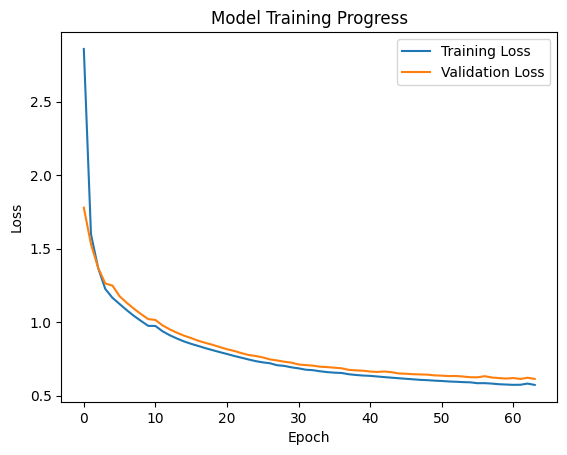

In [109]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Progress')
plt.show()